In [6]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

<Figure size 432x216 with 0 Axes>

In [333]:
data_train=pd.read_csv("NSL_Dataset/Train.csv")

In [334]:
#Data Understanding 

#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data_train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [13]:
data_train.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [335]:
data_train.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [22]:
data_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,Attack_type
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [336]:
data_train["Attack_type"]=np.where(data_train.attack=="normal",0,1)

In [50]:
def Attack_class(x):
    if(x in DOS):
        return "DOS"
    elif(x in Probe):
        return "PROBE"
    elif(x in R2L):
        return "R2L"
    elif(x in U2R):
        return "U2R"
    else:
        return "normal"

In [51]:
DOS=["back","land","neptune","pod","smurf","teardrop","apache2","udpstorm","processtable","worm"]
Probe=["satan","ipsweep","nmap","portsweep","mscan","saint"]
R2L=["guess_passwd","ftp_write","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
U2R=["buffer_overflow","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

In [24]:
data_train.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [337]:
data_train["Attack_class"]=data_train.attack.apply(Attack_class)

In [338]:
data_train.drop("attack", inplace=True, axis=1)

In [64]:
data_train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,DOS
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,1,DOS
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,1,DOS
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21,1,DOS
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,1,DOS
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,21,1,DOS
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.00,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,1,DOS


In [35]:
profile_report = pandas_profiling.ProfileReport(data_train)
profile_report.to_file('profile_report.html')

### Vars to remove
num_outbound_cmds
dst_host_rerror_rate
rerror_rate     
srv_rerror_rate
dst_host_serror_rate
serror_rate     
srv_serror_rate 
num_compromised
service

Skewed--
dst_bytes
num_access_files
num_compromised
num_failed_logins 
num_file_creations
num_root
src_bytes 

In [65]:
to_delete_1=["num_outbound_cmds",
"dst_host_rerror_rate",
"rerror_rate",     
"srv_rerror_rate",
"dst_host_serror_rate",
"serror_rate",     
"srv_serror_rate", 
"num_compromised",
"service"]

In [339]:
data_train.drop(to_delete_1, inplace=True, axis=1)

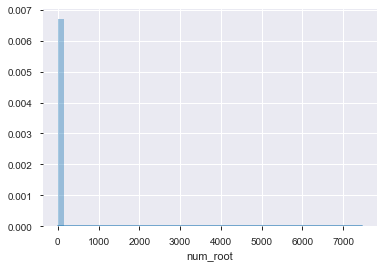

In [40]:
sns.distplot(data_train.num_root)

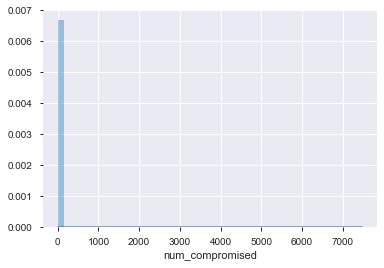

In [41]:
sns.distplot(data_train.num_compromised)

In [72]:
data_train.shape

(125972, 35)

In [68]:
data_train.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'last_flag', 'Attack_type', 'Attack_class'], dtype='object')

In [69]:
data_train.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class
0,0,udp,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,15,0,normal
1,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00,19,1,DOS
2,0,tcp,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.01,0.01,21,0,normal
3,0,tcp,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,21,0,normal
4,0,tcp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,1.00,21,1,DOS


In [73]:
data_train.hot.unique()

array([ 0,  5,  6,  4,  2,  1, 28, 30, 22, 24, 14,  3, 15, 25, 19, 18, 77,
       17, 11,  7, 20, 12,  9, 10,  8, 21, 33, 44], dtype=int64)

In [70]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 36 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 non-null int64
num_shells                     125972 non-null int64
num_access_files               125972 n

## to convert
Attack_type/flag to obj
is_guest_login to obj
is_host_login to obj
land to obj
logged_in to obj
flag to obj
last_flag to obj
num_shells to obj
root_shell to obj
su_attempted to obj
urgent to obj
wrong_fragment to obj


In [340]:
data_train.drop_duplicates(inplace=True)

In [75]:
data_train.shape

(121432, 35)

In [341]:
to_delete_skewed=["dst_bytes",
"num_access_files",
"num_failed_logins", 
"num_file_creations",
"num_root",
"src_bytes"]

In [342]:
data_train.drop(to_delete_skewed, inplace=True, axis=1)

In [80]:
data_train.shape

(121432, 29)

In [343]:
to_obj=["Attack_type",
"is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"last_flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment"]

In [344]:
data_train[to_obj]=data_train[to_obj].astype(object)

In [84]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121432 entries, 0 to 125971
Data columns (total 29 columns):
duration                       121432 non-null int64
protocol_type                  121432 non-null object
flag                           121432 non-null object
land                           121432 non-null object
wrong_fragment                 121432 non-null object
urgent                         121432 non-null object
hot                            121432 non-null int64
logged_in                      121432 non-null object
root_shell                     121432 non-null object
su_attempted                   121432 non-null object
num_shells                     121432 non-null object
is_host_login                  121432 non-null object
is_guest_login                 121432 non-null object
count                          121432 non-null int64
srv_count                      121432 non-null int64
same_srv_rate                  121432 non-null float64
diff_srv_rate               

In [345]:
to_float=["duration","hot","count","srv_count","dst_host_count","dst_host_srv_count"]

In [346]:
data_train[to_float]=data_train[to_float].astype(float)

In [87]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121432 entries, 0 to 125971
Data columns (total 29 columns):
duration                       121432 non-null float64
protocol_type                  121432 non-null object
flag                           121432 non-null object
land                           121432 non-null object
wrong_fragment                 121432 non-null object
urgent                         121432 non-null object
hot                            121432 non-null float64
logged_in                      121432 non-null object
root_shell                     121432 non-null object
su_attempted                   121432 non-null object
num_shells                     121432 non-null object
is_host_login                  121432 non-null object
is_guest_login                 121432 non-null object
count                          121432 non-null float64
srv_count                      121432 non-null float64
same_srv_rate                  121432 non-null float64
diff_srv_rate       

In [347]:
binary_data=data_train[data_train.columns.difference(["Attack_class"])]
multi_data=data_train[data_train.columns.difference(["Attack_type"])]

In [91]:
binary_data

,Attack_type,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,flag,hot,is_guest_login,is_host_login,land,last_flag,logged_in,num_shells,protocol_type,root_shell,same_srv_rate,srv_count,srv_diff_host_rate,su_attempted,urgent,wrong_fragment
0,0,13.0,0.15,255.0,0.60,0.88,0.00,1.0,0.00,0.00,0.00,0.0,SF,0.0,0,0,0,15,0,0,udp,0,0.08,1.0,0.00,0,0,0
1,1,123.0,0.07,255.0,0.05,0.00,0.10,26.0,0.00,0.00,1.00,0.0,S0,0.0,0,0,0,19,0,0,tcp,0,0.05,6.0,0.00,0,0,0
2,0,5.0,0.00,30.0,0.00,0.03,1.00,255.0,0.04,0.01,0.01,0.0,SF,0.0,0,0,0,21,1,0,tcp,0,1.00,5.0,0.00,0,0,0
3,0,30.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.00,0.00,0.0,SF,0.0,0,0,0,21,1,0,tcp,0,1.00,32.0,0.09,0,0,0
4,1,121.0,0.06,255.0,0.07,0.00,0.07,19.0,0.00,1.00,0.00,0.0,REJ,0.0,0,0,0,21,0,0,tcp,0,0.16,19.0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,184.0,0.06,255.0,0.06,0.00,0.10,25.0,0.00,0.00,1.00,0.0,S0,0.0,0,0,0,20,0,0,tcp,0,0.14,25.0,0.00,0,0,0
125968,0,2.0,0.00,255.0,0.01,0.01,0.96,244.0,0.00,0.00,0.00,8.0,SF,0.0,0,0,0,21,0,0,udp,0,1.00,2.0,0.00,0,0,0
125969,0,1.0,0.00,255.0,0.06,0.00,0.12,30.0,0.00,0.00,0.00,0.0,SF,0.0,0,0,0,18,1,0,tcp,0,1.00,1.0,0.00,0,0,0
125970,1,144.0,0.05,255.0,0.05,0.00,0.03,8.0,0.00,0.00,1.00,0.0,S0,0.0,0,0,0,20,0,0,tcp,0,0.06,8.0,0.00,0,0,0


In [92]:
multi_data

,Attack_class,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,flag,hot,is_guest_login,is_host_login,land,last_flag,logged_in,num_shells,protocol_type,root_shell,same_srv_rate,srv_count,srv_diff_host_rate,su_attempted,urgent,wrong_fragment
0,normal,13.0,0.15,255.0,0.60,0.88,0.00,1.0,0.00,0.00,0.00,0.0,SF,0.0,0,0,0,15,0,0,udp,0,0.08,1.0,0.00,0,0,0
1,DOS,123.0,0.07,255.0,0.05,0.00,0.10,26.0,0.00,0.00,1.00,0.0,S0,0.0,0,0,0,19,0,0,tcp,0,0.05,6.0,0.00,0,0,0
2,normal,5.0,0.00,30.0,0.00,0.03,1.00,255.0,0.04,0.01,0.01,0.0,SF,0.0,0,0,0,21,1,0,tcp,0,1.00,5.0,0.00,0,0,0
3,normal,30.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.00,0.00,0.0,SF,0.0,0,0,0,21,1,0,tcp,0,1.00,32.0,0.09,0,0,0
4,DOS,121.0,0.06,255.0,0.07,0.00,0.07,19.0,0.00,1.00,0.00,0.0,REJ,0.0,0,0,0,21,0,0,tcp,0,0.16,19.0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,DOS,184.0,0.06,255.0,0.06,0.00,0.10,25.0,0.00,0.00,1.00,0.0,S0,0.0,0,0,0,20,0,0,tcp,0,0.14,25.0,0.00,0,0,0
125968,normal,2.0,0.00,255.0,0.01,0.01,0.96,244.0,0.00,0.00,0.00,8.0,SF,0.0,0,0,0,21,0,0,udp,0,1.00,2.0,0.00,0,0,0
125969,normal,1.0,0.00,255.0,0.06,0.00,0.12,30.0,0.00,0.00,0.00,0.0,SF,0.0,0,0,0,18,1,0,tcp,0,1.00,1.0,0.00,0,0,0
125970,DOS,144.0,0.05,255.0,0.05,0.00,0.03,8.0,0.00,0.00,1.00,0.0,S0,0.0,0,0,0,20,0,0,tcp,0,0.06,8.0,0.00,0,0,0


In [93]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121432 entries, 0 to 125971
Data columns (total 28 columns):
Attack_type                    121432 non-null object
count                          121432 non-null float64
diff_srv_rate                  121432 non-null float64
dst_host_count                 121432 non-null float64
dst_host_diff_srv_rate         121432 non-null float64
dst_host_same_src_port_rate    121432 non-null float64
dst_host_same_srv_rate         121432 non-null float64
dst_host_srv_count             121432 non-null float64
dst_host_srv_diff_host_rate    121432 non-null float64
dst_host_srv_rerror_rate       121432 non-null float64
dst_host_srv_serror_rate       121432 non-null float64
duration                       121432 non-null float64
flag                           121432 non-null object
hot                            121432 non-null float64
is_guest_login                 121432 non-null object
is_host_login                  121432 non-null object
land         

In [348]:
cat_var_binary=["Attack_type",
"is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"last_flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment",
"protocol_type"]

In [349]:
data_cat_binary=binary_data[cat_var_binary]
data_num_binary=binary_data[binary_data.columns.difference(cat_var_binary)]

In [350]:
data_num_binary.shape

(121432, 15)

In [351]:
data_cat_binary.shape

(121432, 13)

In [352]:
cat_var_multi=["Attack_class",
"is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"last_flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment",
"protocol_type"]

In [353]:
data_cat_multi=multi_data[cat_var_multi]

In [354]:
data_num_multi=multi_data[multi_data.columns.difference(cat_var_multi)]

In [355]:
data_num_multi.shape

(121432, 15)

In [356]:
data_cat_multi.shape

(121432, 13)

In [104]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [357]:
data_num_binary=data_num_binary.apply(outlier_capping)
data_num_multi=data_num_multi.apply(outlier_capping)

In [106]:
data_cat_binary=pd.get_dummies(data_cat_binary, drop_first=True)

In [358]:
data_cat_multi.head()

,Attack_class,is_guest_login,is_host_login,land,logged_in,flag,last_flag,num_shells,root_shell,su_attempted,urgent,wrong_fragment,protocol_type
0,normal,0,0,0,0,SF,15,0,0,0,0,0,udp
1,DOS,0,0,0,0,S0,19,0,0,0,0,0,tcp
2,normal,0,0,0,1,SF,21,0,0,0,0,0,tcp
3,normal,0,0,0,1,SF,21,0,0,0,0,0,tcp
4,DOS,0,0,0,0,REJ,21,0,0,0,0,0,tcp


In [360]:
data_cat_multi_TARGET=data_cat_multi.Attack_class

In [361]:
data_cat_multi_no_target=data_cat_multi[data_cat_multi.columns.difference(["Attack_class"])]

In [363]:
data_cat_multi=pd.get_dummies(data_cat_multi_no_target, drop_first=True)

In [364]:
data_binary=pd.concat([data_num_binary,data_cat_binary],axis=1)
data_multi=pd.concat([data_num_multi,data_cat_multi,data_cat_multi_TARGET],axis=1)

In [365]:
data_binary

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,same_srv_rate,srv_count,srv_diff_host_rate,Attack_type,is_guest_login,is_host_login,land,logged_in,flag,last_flag,num_shells,root_shell,su_attempted,urgent,wrong_fragment,protocol_type
0,13.0,0.15,255.0,0.60,0.88,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.08,1.0,0.00,0,0,0,0,0,SF,15,0,0,0,0,0,udp
1,123.0,0.07,255.0,0.05,0.00,0.10,26.0,0.00,0.00,1.00,0.0,0.0,0.05,6.0,0.00,1,0,0,0,0,S0,19,0,0,0,0,0,tcp
2,5.0,0.00,30.0,0.00,0.03,1.00,255.0,0.04,0.01,0.01,0.0,0.0,1.00,5.0,0.00,0,0,0,0,1,SF,21,0,0,0,0,0,tcp
3,30.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.00,0.00,0.0,0.0,1.00,32.0,0.09,0,0,0,0,1,SF,21,0,0,0,0,0,tcp
4,121.0,0.06,255.0,0.07,0.00,0.07,19.0,0.00,1.00,0.00,0.0,0.0,0.16,19.0,0.00,1,0,0,0,0,REJ,21,0,0,0,0,0,tcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,184.0,0.06,255.0,0.06,0.00,0.10,25.0,0.00,0.00,1.00,0.0,0.0,0.14,25.0,0.00,1,0,0,0,0,S0,20,0,0,0,0,0,tcp
125968,2.0,0.00,255.0,0.01,0.01,0.96,244.0,0.00,0.00,0.00,8.0,0.0,1.00,2.0,0.00,0,0,0,0,0,SF,21,0,0,0,0,0,udp
125969,1.0,0.00,255.0,0.06,0.00,0.12,30.0,0.00,0.00,0.00,0.0,0.0,1.00,1.0,0.00,0,0,0,0,1,SF,18,0,0,0,0,0,tcp
125970,144.0,0.05,255.0,0.05,0.00,0.03,8.0,0.00,0.00,1.00,0.0,0.0,0.06,8.0,0.00,1,0,0,0,0,S0,20,0,0,0,0,0,tcp


In [366]:
data_multi

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,same_srv_rate,srv_count,srv_diff_host_rate,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,is_guest_login_1,is_host_login_1,land_1,last_flag_1,last_flag_2,last_flag_3,last_flag_4,last_flag_5,last_flag_6,last_flag_7,last_flag_8,last_flag_9,last_flag_10,last_flag_11,last_flag_12,last_flag_13,last_flag_14,last_flag_15,last_flag_16,last_flag_17,last_flag_18,last_flag_19,last_flag_20,last_flag_21,logged_in_1,num_shells_1,num_shells_2,protocol_type_tcp,protocol_type_udp,root_shell_1,su_attempted_1,su_attempted_2,urgent_1,urgent_2,urgent_3,wrong_fragment_1,wrong_fragment_3,Attack_class
0,13.0,0.15,255.0,0.60,0.88,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.08,1.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,normal
1,123.0,0.07,255.0,0.05,0.00,0.10,26.0,0.00,0.00,1.00,0.0,0.0,0.05,6.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,DOS
2,5.0,0.00,30.0,0.00,0.03,1.00,255.0,0.04,0.01,0.01,0.0,0.0,1.00,5.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,normal
3,30.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.00,0.00,0.0,0.0,1.00,32.0,0.09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,normal
4,121.0,0.06,255.0,0.07,0.00,0.07,19.0,0.00,1.00,0.00,0.0,0.0,0.16,19.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,DOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,184.0,0.06,255.0,0.06,0.00,0.10,25.0,0.00,0.00,1.00,0.0,0.0,0.14,25.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,DOS
125968,2.0,0.00,255.0,0.01,0.01,0.96,244.0,0.00,0.00,0.00,8.0,0.0,1.00,2.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,normal
125969,1.0,0.00,255.0,0.06,0.00,0.12,30.0,0.00,0.00,0.00,0.0,0.0,1.00,1.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,normal
125970,144.0,0.05,255.0,0.05,0.00,0.03,8.0,0.00,0.00,1.00,0.0,0.0,0.06,8.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,DOS


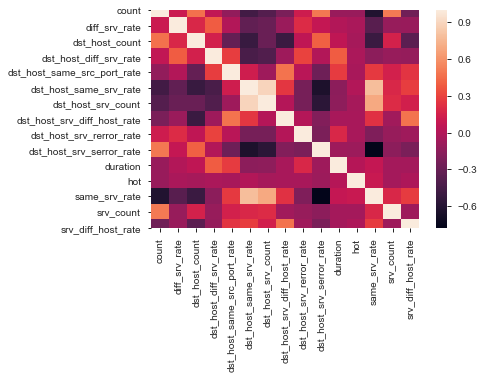

In [113]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_num_binary.corr())

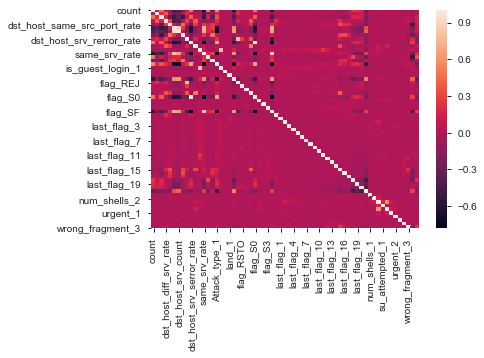

In [114]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_binary.corr())

In [115]:
corr_binary = data_binary.corr()
corr_binary.to_csv('corr_binary.csv')

In [116]:
data_binary.Attack_type_1

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: Attack_type_1, Length: 121432, dtype: uint8

### variable reduction (feature selection/reduction)

- Univariate Regression
- WOE - Binomial classification
- RFE
- SelectKBest
- VIF
- PCA

#### Univariate Regression

In [118]:
somersd_df = pd.DataFrame()
for num_variable in data_binary.columns.difference(['Attack_type_1']):
    result = smf.logit(formula = str('Attack_type_1 ~ ')+str(num_variable), data=data_binary).fit()
    somers_d = 2*metrics.roc_auc_score(data_binary.Attack_type_1, result.predict()) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['VariableName', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.481591
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.668267
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616467
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660111
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.681608
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.428531
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.384856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.685386
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.657855
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.422402
  

In [126]:
imp_vars_SD = somersd_df.sort_values('SomersD', ascending=False).head(20)

In [127]:
imp_vars_SD

,VariableName,SomersD
0,dst_host_srv_count,0.778376
0,same_srv_rate,0.739923
0,flag_SF,0.731553
0,dst_host_same_srv_rate,0.716836
0,diff_srv_rate,0.681405
0,logged_in_1,0.674461
0,dst_host_diff_srv_rate,0.638261
0,count,0.631631
0,flag_S0,0.585112
0,dst_host_srv_serror_rate,0.569281


In [128]:
imp_vars_somerceD = list(imp_vars_SD.VariableName.values)

In [129]:
imp_vars_somerceD

['dst_host_srv_count',
 'same_srv_rate',
 'flag_SF',
 'dst_host_same_srv_rate',
 'diff_srv_rate',
 'logged_in_1',
 'dst_host_diff_srv_rate',
 'count',
 'flag_S0',
 'dst_host_srv_serror_rate',
 'last_flag_21',
 'dst_host_count',
 'srv_diff_host_rate',
 'protocol_type_udp',
 'last_flag_18',
 'dst_host_srv_rerror_rate',
 'last_flag_19',
 'flag_REJ',
 'last_flag_20',
 'last_flag_15']

#### RFE

In [131]:
X = data_binary[data_binary.columns.difference(['Attack_type_1'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X, data_binary[['Attack_type_1']])

In [132]:
imp_vars_RFE = list(X.columns[rfe.support_])

In [133]:
imp_vars_RFE

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_S0',
 'flag_SF',
 'hot',
 'last_flag_20',
 'last_flag_21',
 'logged_in_1',
 'protocol_type_tcp',
 'protocol_type_udp',
 'same_srv_rate',
 'srv_count']

#### Select KBEST

In [140]:
X = data_binary[data_binary.columns.difference(['Attack_type_1'])]
SKB = SelectKBest(f_classif, k=20).fit(X, data_binary[['Attack_type_1']])

In [141]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [142]:
imp_vars_SKB

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_REJ',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'last_flag_15',
 'last_flag_18',
 'last_flag_19',
 'last_flag_20',
 'last_flag_21',
 'logged_in_1',
 'protocol_type_udp',
 'same_srv_rate']

## Final List (from Univariate, RFE, SelectKbest)

In [143]:
Final_list = list(set(imp_vars_SKB + imp_vars_somerceD + imp_vars_RFE))

In [144]:
Final_list

['last_flag_20',
 'last_flag_21',
 'diff_srv_rate',
 'dst_host_srv_count',
 'flag_REJ',
 'flag_S0',
 'srv_count',
 'count',
 'last_flag_19',
 'dst_host_same_src_port_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_tcp',
 'srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'logged_in_1',
 'dst_host_srv_diff_host_rate',
 'flag_RSTR',
 'flag_SF',
 'dst_host_count',
 'hot',
 'dst_host_srv_serror_rate',
 'last_flag_18',
 'protocol_type_udp',
 'last_flag_15',
 'same_srv_rate']

In [146]:
X = data_binary[Final_list]

In [155]:
X.columns

Index(['last_flag_20', 'last_flag_21', 'diff_srv_rate', 'dst_host_srv_count', 'flag_REJ', 'flag_S0', 'srv_count', 'count', 'last_flag_19', 'dst_host_same_src_port_rate', 'dst_host_srv_rerror_rate', 'protocol_type_tcp', 'srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate', 'logged_in_1', 'dst_host_srv_diff_host_rate', 'flag_RSTR', 'flag_SF', 'dst_host_count', 'hot', 'dst_host_srv_serror_rate', 'last_flag_18', 'protocol_type_udp', 'last_flag_15', 'same_srv_rate'], dtype='object')

#### Using WOE (Weight of Evidence)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

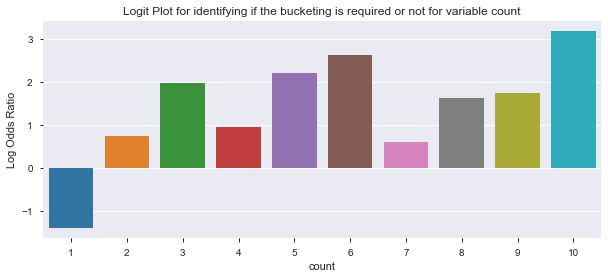

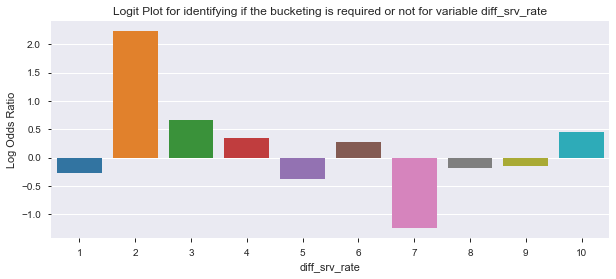

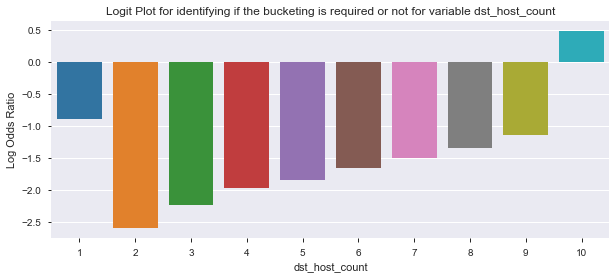

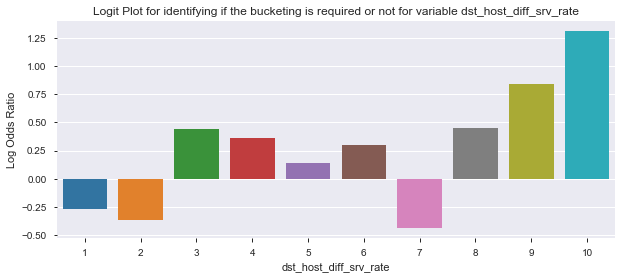

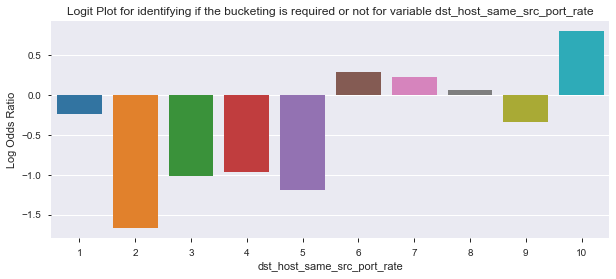

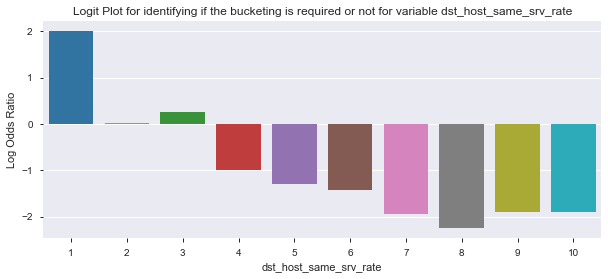

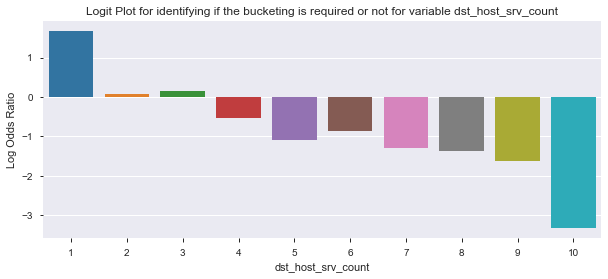

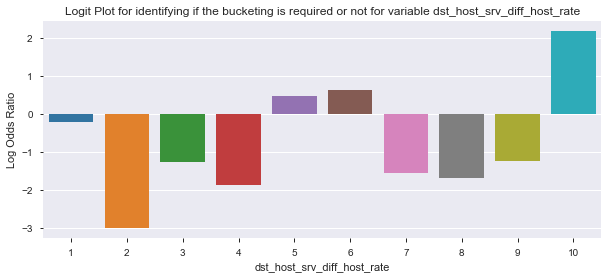

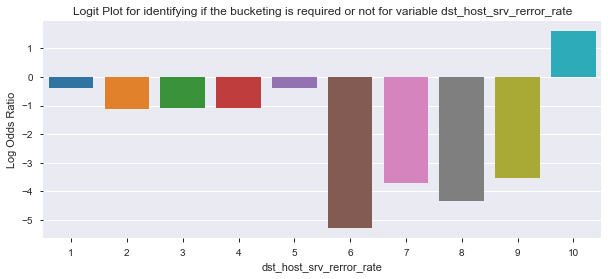

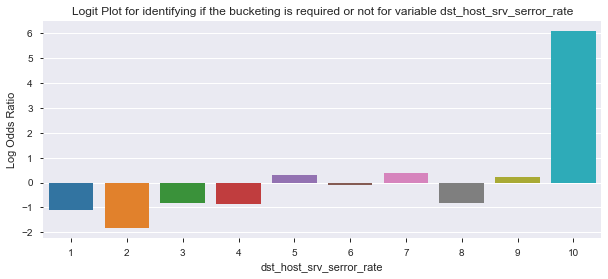

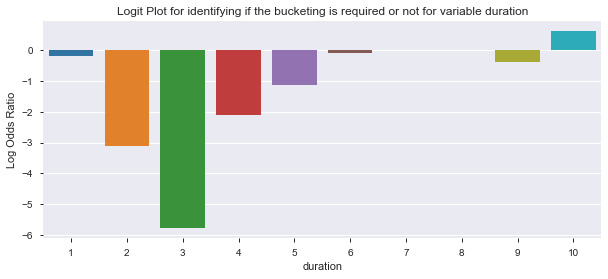

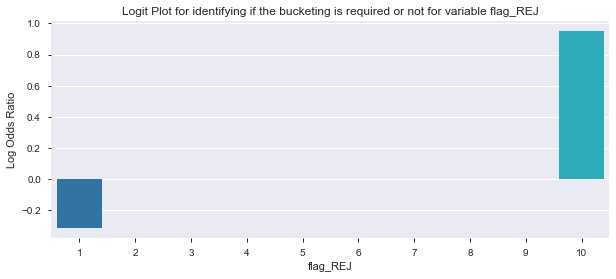

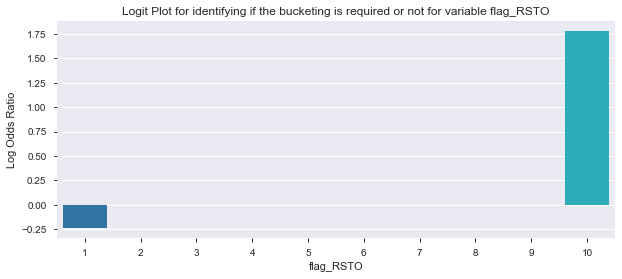

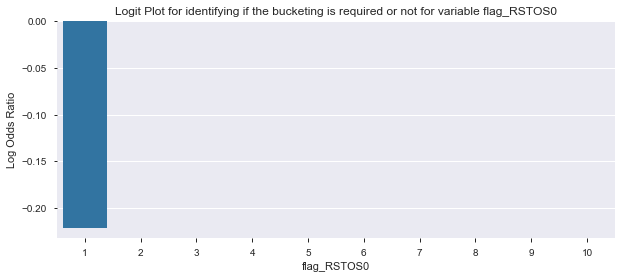

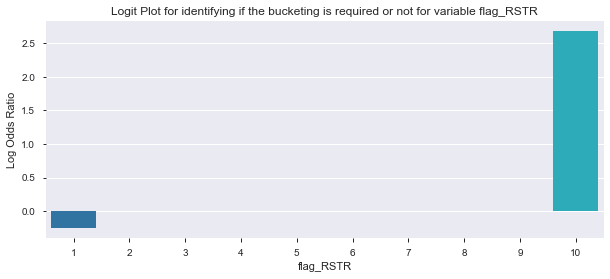

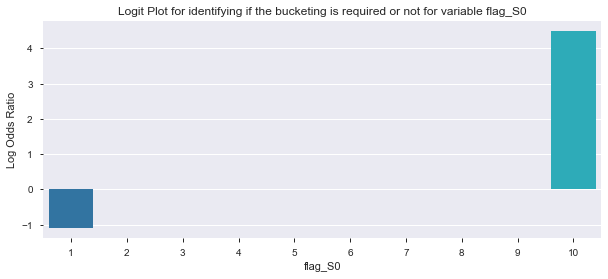

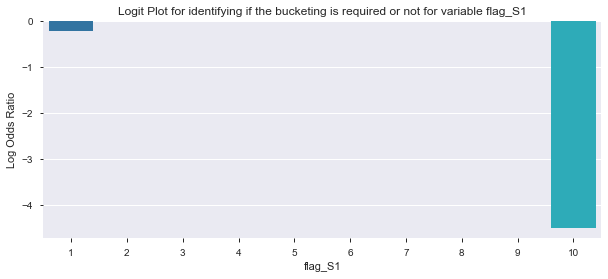

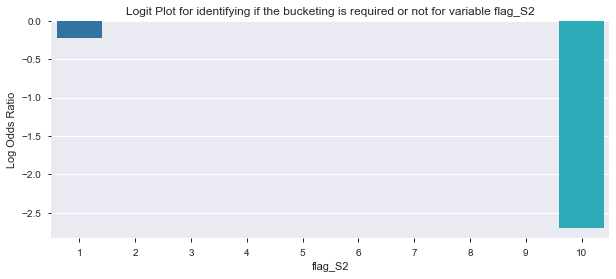

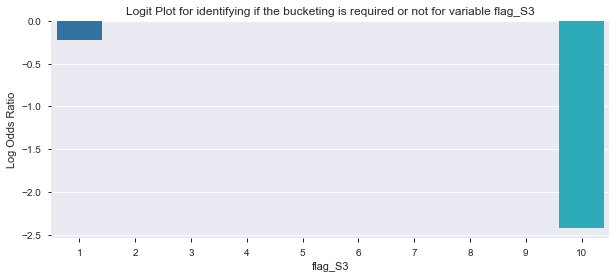

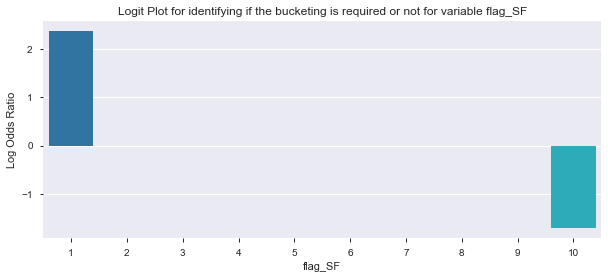

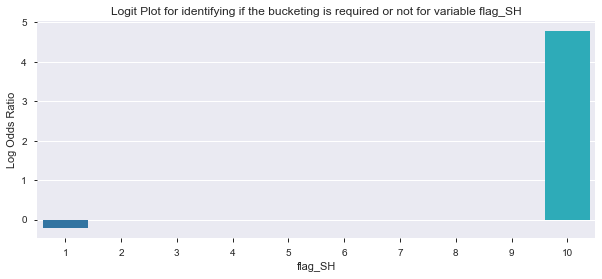

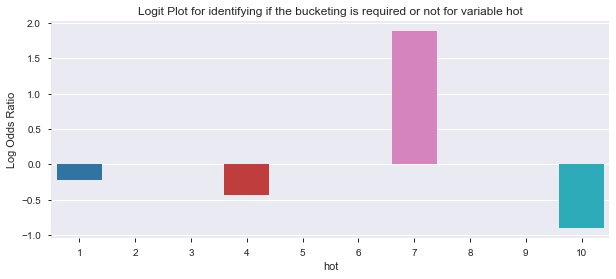

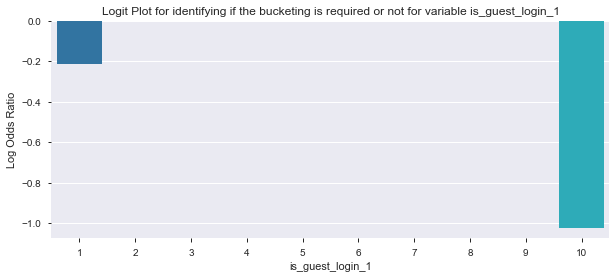

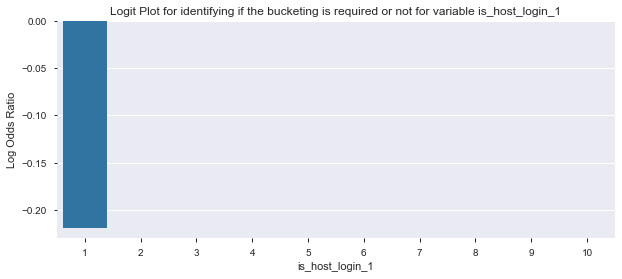

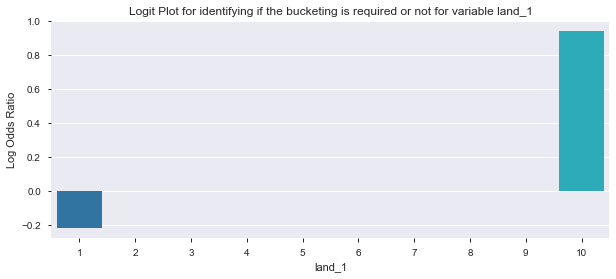

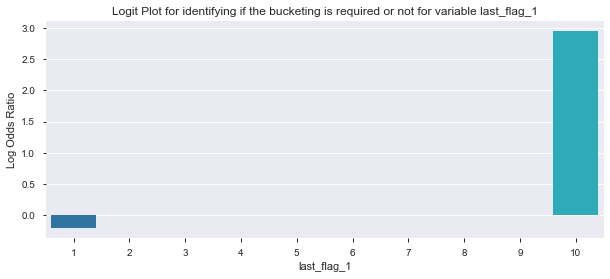

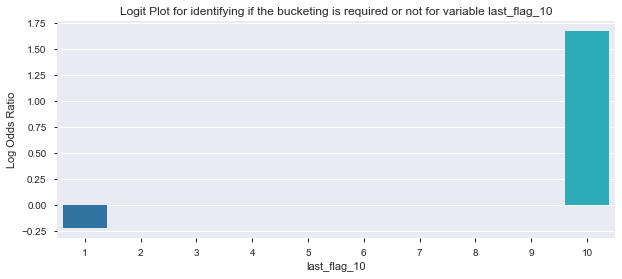

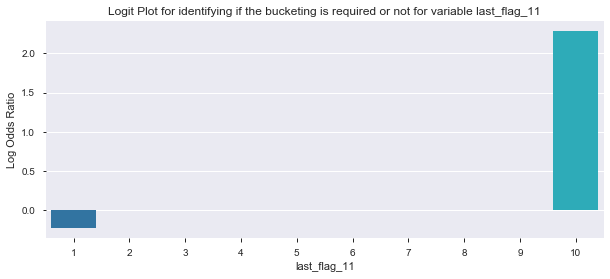

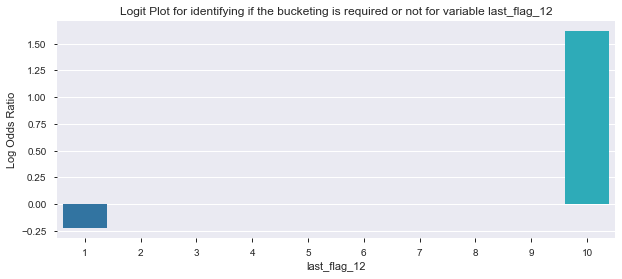

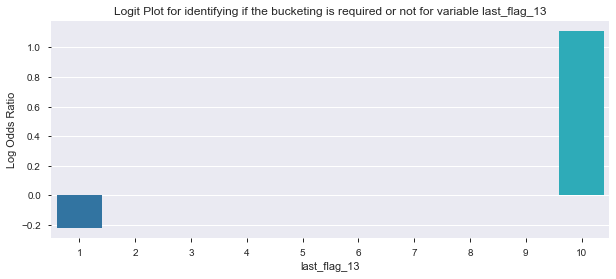

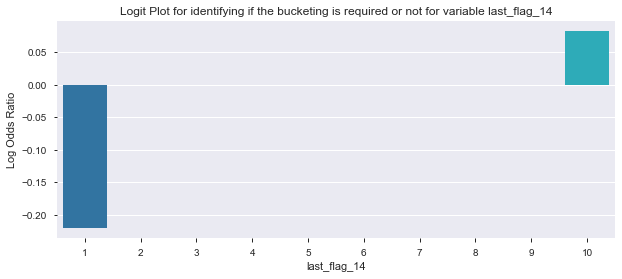

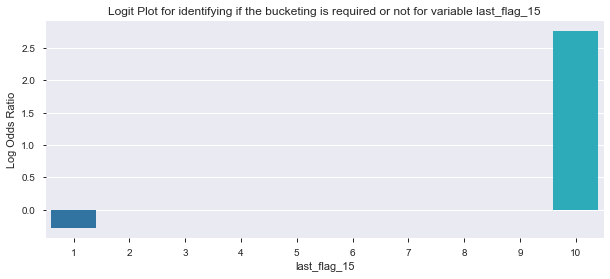

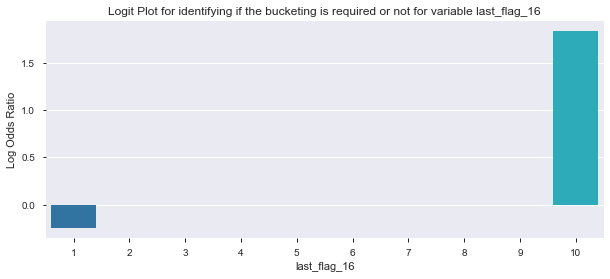

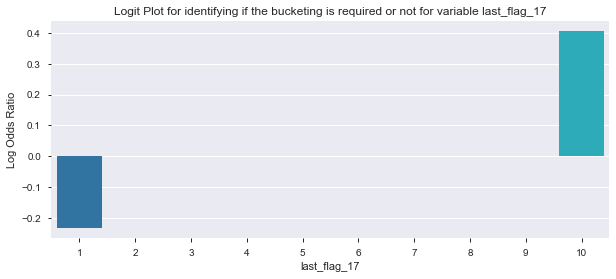

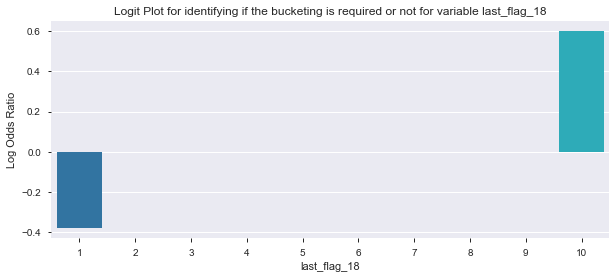

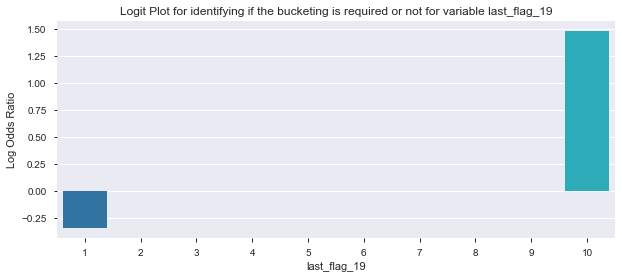

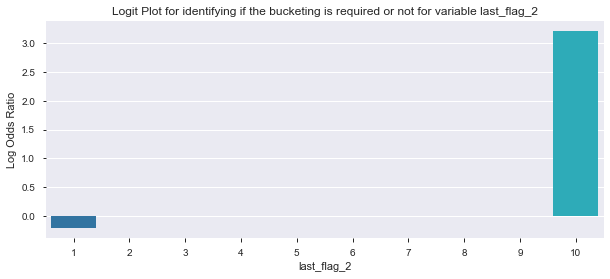

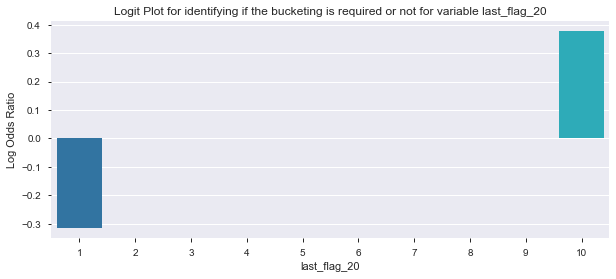

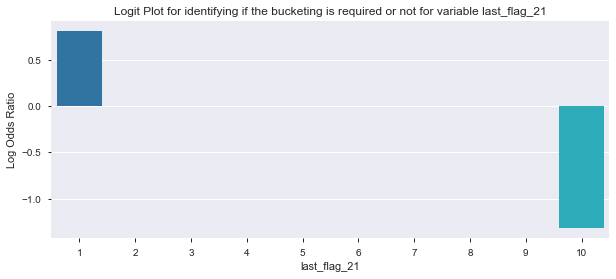

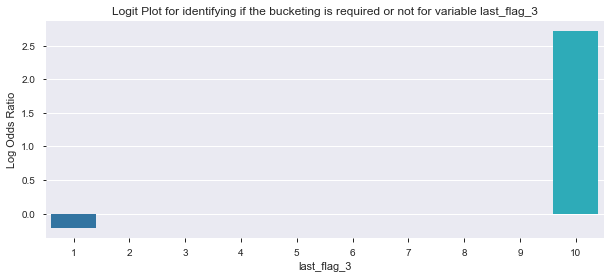

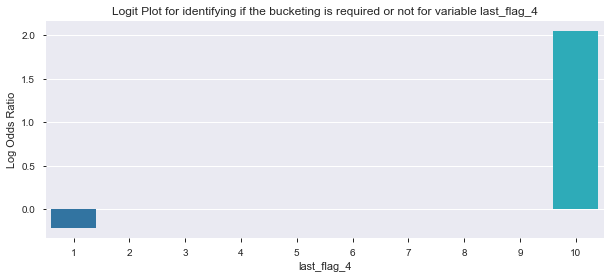

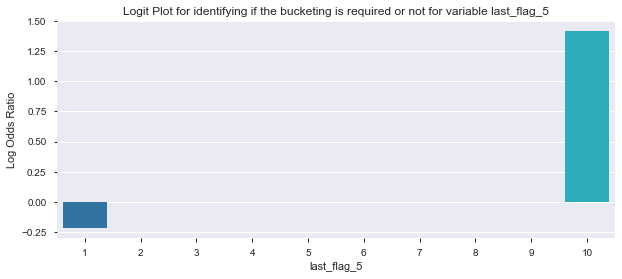

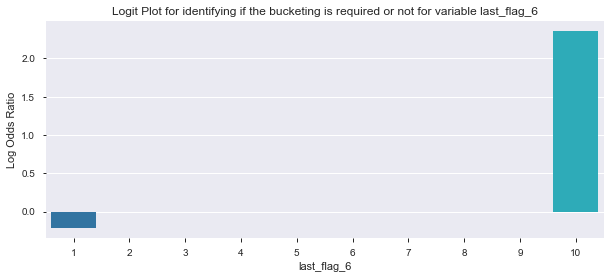

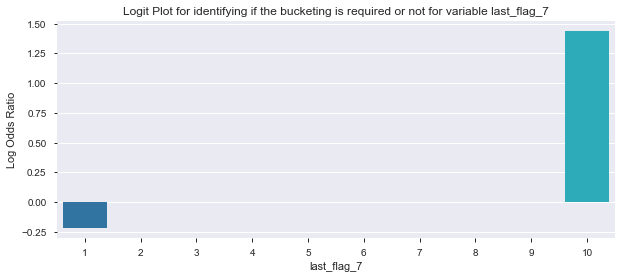

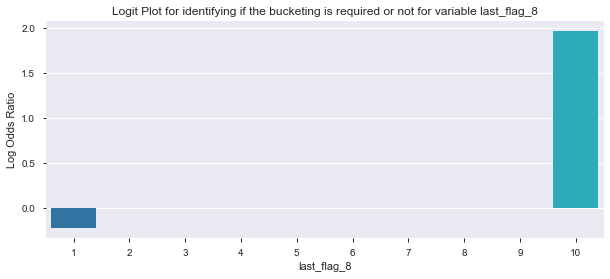

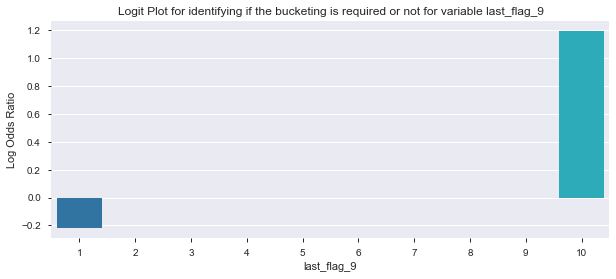

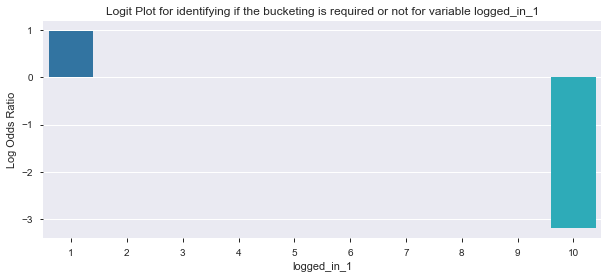

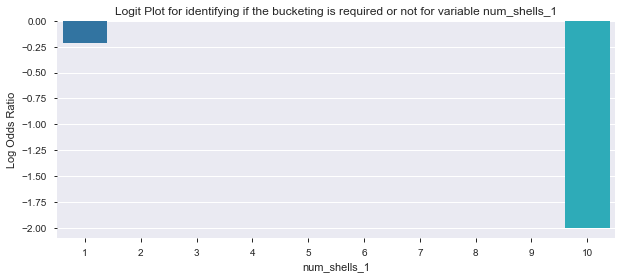

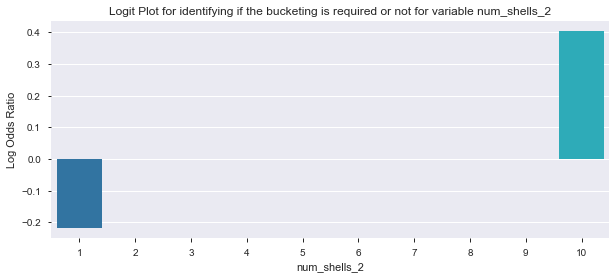

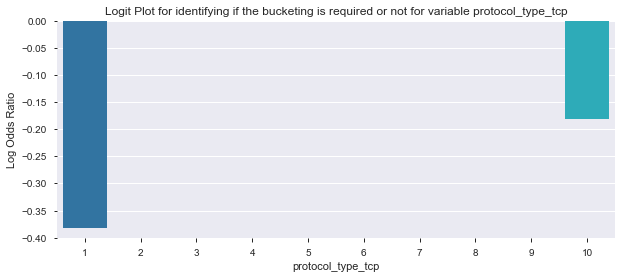

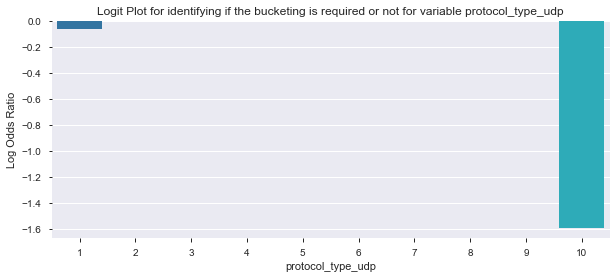

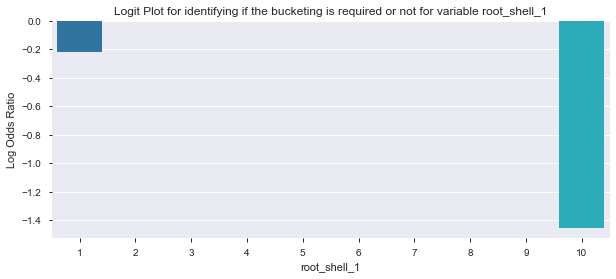

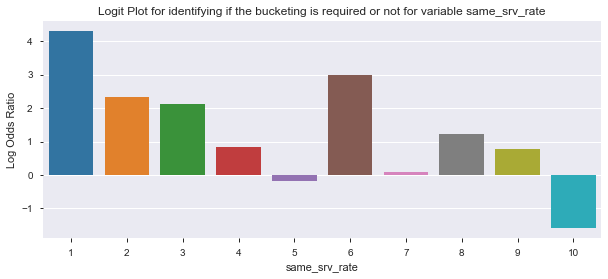

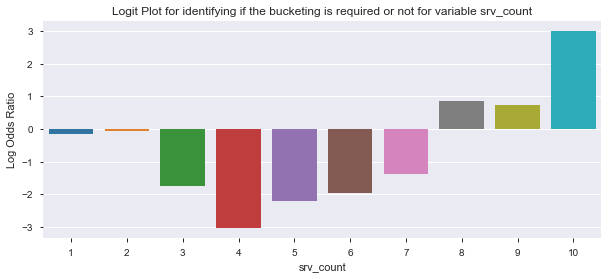

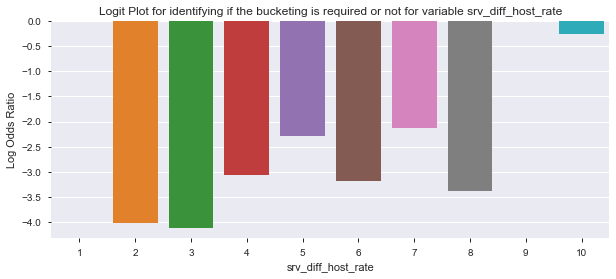

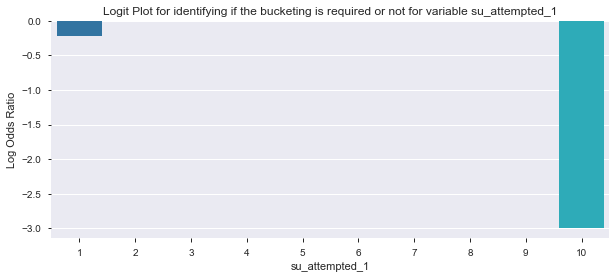

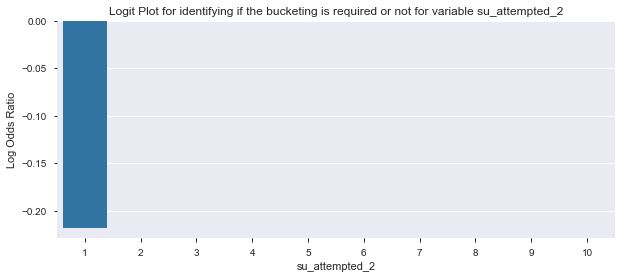

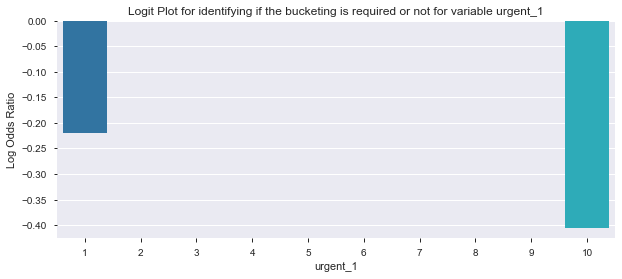

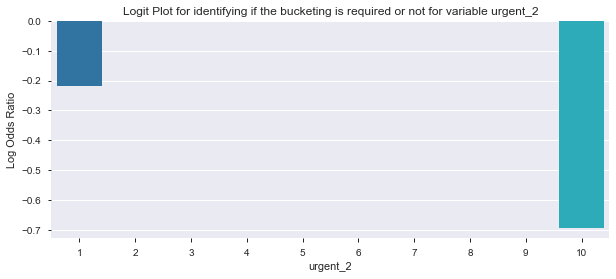

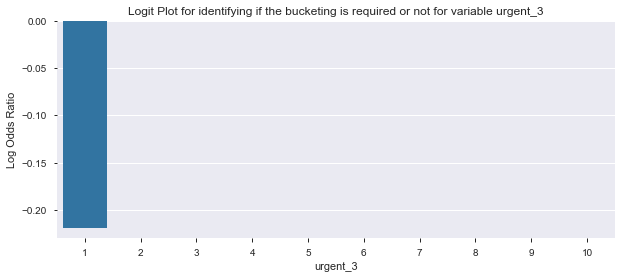

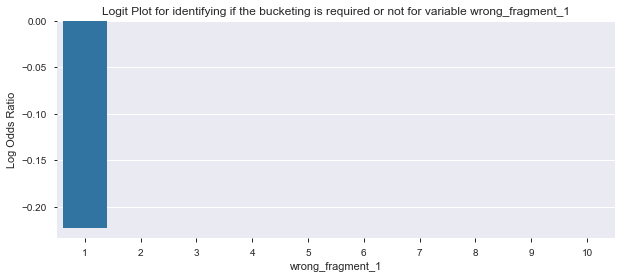

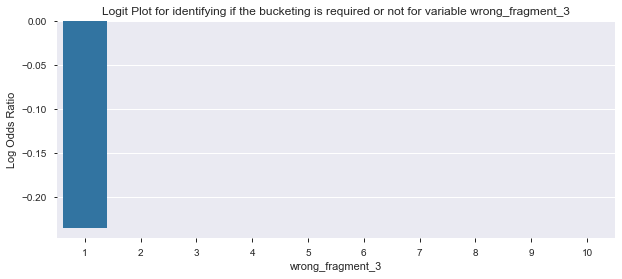

In [150]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in data_binary.columns.difference(['Attack_type_1']):
    binned = pd.cut(data_binary[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_binary.groupby(binned)['Attack_type_1'].sum() / (data_binary.groupby(binned)['Attack_type_1'].count()-data_binary.groupby(binned)['Attack_type_1'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [151]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Normal': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Attack': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Normal'] = dset['Normal'] / dset['Normal'].sum()
    dset['Distr_Attack'] = dset['Attack'] / dset['Attack'].sum()
    dset['WoE'] = np.log(dset['Distr_Normal'] / dset['Distr_Attack'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Normal'] - dset['Distr_Attack']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [152]:
for col in data_binary.columns:
    if col == 'Attack_type_1': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(data_binary, col, 'Attack_type_1')
       # print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: count
IV score: 2.49


WoE and IV for column: diff_srv_rate
IV score: 4.89


WoE and IV for column: dst_host_count
IV score: 1.25


WoE and IV for column: dst_host_diff_srv_rate
IV score: 2.63


WoE and IV for column: dst_host_same_src_port_rate
IV score: 1.15


WoE and IV for column: dst_host_same_srv_rate
IV score: 2.87


WoE and IV for column: dst_host_srv_count
IV score: 3.43


WoE and IV for column: dst_host_srv_diff_host_rate
IV score: 2.26


WoE and IV for column: dst_host_srv_rerror_rate
IV score: 0.48


WoE and IV for column: dst_host_srv_serror_rate
IV score: 4.78


WoE and IV for column: duration
IV score: 0.14


WoE and IV for column: hot
IV score: 0.03


WoE and IV for column: same_srv_rate
IV score: 4.20


WoE and IV for column: srv_count
IV score: 0.64


WoE and IV for column: srv_diff_host_rate
IV score: 0.87


WoE and IV for column: is_guest_login_1
IV score: 0.01


WoE and IV for column: is_host_login_1
IV score: 0.00


WoE and IV for column: la

In [153]:
data_binary.shape

(121432, 63)

In [158]:
good_iv=["dst_host_srv_rerror_rate",
         "srv_count",
         "duration",
         "protocol_type_udp",
         "last_flag_21",
         "last_flag_19",
         "last_flag_18",
         "last_flag_15",
         "flag_RSTR",
         "flag_REJ",
         "srv_diff_host_rate",
        ]

 You can select the variables based on the information value and below criteria
 
 - IV: <0.02, Predictive Power: Useless for prediction
 - IV: 0.02 - 0.1, Predictive Power: Weak predictor
 - IV: 0.1 - 0.2, Predictive Power: Medium predictor
 - IV: 0.3 - 0.5, Predictive Power: Storng predictor
 - IV: > 0.5, Predictive Power: Suspecious predictor or too good predictor

In [159]:
good_iv

['dst_host_srv_rerror_rate',
 'srv_count',
 'duration',
 'protocol_type_udp',
 'last_flag_21',
 'last_flag_19',
 'last_flag_18',
 'last_flag_15',
 'flag_RSTR',
 'flag_REJ',
 'srv_diff_host_rate']

In [162]:
final_X=list(X.columns.values)

In [165]:
final_X

['last_flag_20',
 'last_flag_21',
 'diff_srv_rate',
 'dst_host_srv_count',
 'flag_REJ',
 'flag_S0',
 'srv_count',
 'count',
 'last_flag_19',
 'dst_host_same_src_port_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_tcp',
 'srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'logged_in_1',
 'dst_host_srv_diff_host_rate',
 'flag_RSTR',
 'flag_SF',
 'dst_host_count',
 'hot',
 'dst_host_srv_serror_rate',
 'last_flag_18',
 'protocol_type_udp',
 'last_flag_15',
 'same_srv_rate']

In [166]:
final_list=list(set(final_X+good_iv))

In [245]:
final_list=[
    #'last_flag_20',
 #'last_flag_21',
 'diff_srv_rate',
 #'dst_host_srv_count',
 'flag_REJ',
 #'flag_S0',
 'duration',
 #'srv_count',
 'count',
 'last_flag_19',
 #'dst_host_same_src_port_rate',
 #'dst_host_srv_rerror_rate',
 #'protocol_type_tcp',
 'srv_diff_host_rate',
 #'dst_host_diff_srv_rate',
 #'dst_host_same_srv_rate',
 'logged_in_1',
 #'dst_host_srv_diff_host_rate',
 #'flag_RSTR',
 #'flag_SF',
 #'dst_host_count',
 'hot',
 #'dst_host_srv_serror_rate',
 #'last_flag_18',
 'protocol_type_udp',
 #'last_flag_15',
 'same_srv_rate']

#### VIF Variance Inflation Factor

In [246]:
X_new=data_binary[final_list]

In [247]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [248]:
vif.sort_values(by=["VIF Factor"], ascending=False)

,VIF Factor,features
9,5.853448,same_srv_rate
6,4.241133,logged_in_1
8,1.800700,protocol_type_udp
3,1.359800,count
5,1.310004,srv_diff_host_rate
1,1.224505,flag_REJ
0,1.204219,diff_srv_rate
4,1.144515,last_flag_19
2,1.072616,duration
7,1.053044,hot


### Splitting the data into train & test 

In [249]:
X_new=data_binary[final_list]

In [397]:
data_multi.shape

(121432, 63)

In [368]:
X_new_multi=data_multi[data_multi.columns.difference(['Attack_class'])]

In [250]:
target = data_binary[['Attack_type_1']]
features = X_new

In [369]:
target_multi = data_multi[['Attack_class']]
features_multi = X_new_multi

In [398]:
features_multi.shape

(121432, 62)

In [378]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [379]:
#Splitting the data for sklearn methods
train_y_multi, test_y_multi, train_X_multi, test_X_multi = train_test_split(target_multi,features_multi, test_size=0.3, random_state=123)

In [380]:
#for logistic regression using statsmodels
train, test = train_test_split(data_binary, test_size=0.3, random_state=0)

In [381]:
#for logistic regression using statsmodels
train_multi, test_multi = train_test_split(data_multi, test_size=0.3, random_state=123)

In [382]:
train_multi.columns

Index(['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'duration', 'hot', 'same_srv_rate', 'srv_count', 'srv_diff_host_rate', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'is_guest_login_1', 'is_host_login_1', 'land_1', 'last_flag_1', 'last_flag_2', 'last_flag_3', 'last_flag_4', 'last_flag_5', 'last_flag_6', 'last_flag_7', 'last_flag_8', 'last_flag_9', 'last_flag_10', 'last_flag_11', 'last_flag_12', 'last_flag_13', 'last_flag_14', 'last_flag_15', 'last_flag_16', 'last_flag_17', 'last_flag_18', 'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_1', 'num_shells_1', 'num_shells_2', 'protocol_type_tcp', 'protocol_type_udp', 'root_shell_1', 'su_attempted_1', 'su_attempted_2', 'urgent_1', 'urgent_2', 'urgent_3',
       'wrong_

In [383]:
final_list_multi=['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'duration', 'hot', 'same_srv_rate', 'srv_count', 'srv_diff_host_rate', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'is_guest_login_1', 'is_host_login_1', 'land_1', 'last_flag_1', 'last_flag_2', 'last_flag_3', 'last_flag_4', 'last_flag_5', 'last_flag_6', 'last_flag_7', 'last_flag_8', 'last_flag_9', 'last_flag_10', 'last_flag_11', 'last_flag_12', 'last_flag_13', 'last_flag_14', 'last_flag_15', 'last_flag_16', 'last_flag_17', 'last_flag_18', 'last_flag_19', 'last_flag_20', 'last_flag_21', 'logged_in_1', 'num_shells_1', 'num_shells_2', 'protocol_type_tcp', 'protocol_type_udp', 'root_shell_1', 'su_attempted_1', 'su_attempted_2', 'urgent_1', 'urgent_2', 'urgent_3',
       'wrong_fragment_1', 'wrong_fragment_3']

### Logistic Regression Using Stats Models (Traiditional Approach)

In [327]:
formula='Attack_type_1 ~ ' + "+".join(final_list)

In [384]:
formula_multi='Attack_class ~ ' + "+".join(final_list_multi)

In [255]:
formula

'Attack_type_1 ~ diff_srv_rate+flag_REJ+duration+count+last_flag_19+srv_diff_host_rate+logged_in_1+hot+protocol_type_udp+same_srv_rate'

In [385]:
formula_multi

'Attack_class ~ count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+dst_host_srv_rerror_rate+dst_host_srv_serror_rate+duration+hot+same_srv_rate+srv_count+srv_diff_host_rate+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+is_guest_login_1+is_host_login_1+land_1+last_flag_1+last_flag_2+last_flag_3+last_flag_4+last_flag_5+last_flag_6+last_flag_7+last_flag_8+last_flag_9+last_flag_10+last_flag_11+last_flag_12+last_flag_13+last_flag_14+last_flag_15+last_flag_16+last_flag_17+last_flag_18+last_flag_19+last_flag_20+last_flag_21+logged_in_1+num_shells_1+num_shells_2+protocol_type_tcp+protocol_type_udp+root_shell_1+su_attempted_1+su_attempted_2+urgent_1+urgent_2+urgent_3+wrong_fragment_1+wrong_fragment_3'

In [256]:
logreg = smf.logit(formula=formula, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.187506
         Iterations 8


In [387]:
#logreg_multi = smf.logit(formula=formula_multi, data=train_multi)
#result_multi = logreg_multi.fit()

In [257]:
print(result.summary2())

                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.727     
Dependent Variable:   Attack_type_1    AIC:              31898.6919
Date:                 2020-04-22 02:08 BIC:              32001.5466
No. Observations:     85002            Log-Likelihood:   -15938.   
Df Model:             10               LL-Null:          -58408.   
Df Residuals:         84991            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           5.0429   0.0678  74.3762 0.0000  4.9100  5.1758
diff_srv_rate      -2.4300   0.0821 -29.6002 0.0000 -2.5909 -2.2691
flag_REJ           -1.7161   0.0498 -34.4865 0.0000 -1.8137 -1.6186
duratio

### Logistic Regression Multi Class

In [437]:
model_reg = LogisticRegression()
model_reg.fit(train_X_multi, train_y_multi)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [438]:
y_pred_train=model_reg.predict(train_X_multi)

In [439]:
y_pred_test=model_reg.predict(test_X_multi)

In [440]:
print(metrics.classification_report( train_y_multi, y_pred_train))

              precision    recall  f1-score   support

         DOS       0.87      0.91      0.89     29947
       PROBE       0.58      0.09      0.15      7177
         R2L       0.00      0.00      0.00       701
         U2R       0.00      0.00      0.00        33
      normal       0.87      0.97      0.92     47144

    accuracy                           0.87     85002
   macro avg       0.46      0.39      0.39     85002
weighted avg       0.84      0.87      0.83     85002



In [441]:
print(metrics.classification_report( test_y_multi, y_pred_test))

              precision    recall  f1-score   support

         DOS       0.87      0.92      0.89     12915
       PROBE       0.59      0.08      0.14      3009
         R2L       0.00      0.00      0.00       294
         U2R       0.00      0.00      0.00        19
      normal       0.87      0.96      0.91     20193

    accuracy                           0.87     36430
   macro avg       0.46      0.39      0.39     36430
weighted avg       0.84      0.87      0.83     36430



In [490]:
model_RF=RandomForestClassifier()

In [491]:
model_RF.fit(train_X_multi, train_y_multi)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [492]:
y_pred_train_RF=model_RF.predict(train_X_multi)

In [493]:
y_pred_test_RF=model_RF.predict(test_X_multi)

In [494]:
print(metrics.classification_report( train_y_multi, y_pred_train_RF))

              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     29947
       PROBE       1.00      1.00      1.00      7177
         R2L       1.00      1.00      1.00       701
         U2R       1.00      1.00      1.00        33
      normal       1.00      1.00      1.00     47144

    accuracy                           1.00     85002
   macro avg       1.00      1.00      1.00     85002
weighted avg       1.00      1.00      1.00     85002



In [495]:
print(metrics.classification_report( test_y_multi, y_pred_test_RF))

              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     12915
       PROBE       1.00      0.99      0.99      3009
         R2L       0.96      0.96      0.96       294
         U2R       1.00      0.32      0.48        19
      normal       1.00      1.00      1.00     20193

    accuracy                           1.00     36430
   macro avg       0.99      0.85      0.89     36430
weighted avg       1.00      1.00      1.00     36430



### Accuracy Metrics

In [258]:
train_gini = 2*metrics.roc_auc_score(train['Attack_type_1'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['Attack_type_1'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['Attack_type_1'], result.predict(train))
test_auc = metrics.roc_auc_score(test['Attack_type_1'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9470613118847389
The Gini Index for the model built on the Test Data is :  0.9465569274229979
The AUC for the model built on the Train Data is :  0.9735306559423694
The AUC for the model built on the Test Data is :  0.973278463711499


In [260]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['Attack_type_1']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head(10)

,actual,prob
85999,0,0.014030
23256,1,0.990114
15108,1,0.996906
80128,1,0.997998
71860,1,0.998139
87862,0,0.012713
113445,0,0.011956
81274,1,0.996368
29358,0,0.012502
75319,0,0.229240


In [261]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['Attack_type_1']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
79648,0,0.014376
30551,0,0.011957
13864,0,0.011956
54798,1,0.997043
110062,1,0.960197


In [262]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [263]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.445260
0,0.020408,0.988982,0.607690,0.777464
0,0.040816,0.988665,0.688489,0.822145
0,0.061224,0.977621,0.718582,0.833922
0,0.081633,0.968796,0.747572,0.846074


In [264]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [265]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.445260,1.000000
0,0.020408,0.988982,0.607690,0.777464,1.596672
0,0.040816,0.988665,0.688489,0.822145,1.677154
0,0.061224,0.977621,0.718582,0.833922,1.696203
0,0.081633,0.968796,0.747572,0.846074,1.716368


In [266]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.612245,0.86961,0.983098,0.932566,1.852708


In [267]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.612245,0.86961,0.983098,0.932566,1.852708


In [268]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.44526,1.0


In [300]:
#Choosen Best Cut-off is 0.23 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.612245 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.612245 else 0)

In [301]:
train_predict.head()

,actual,prob,predicted
85999,0,0.014030,0
23256,1,0.990114,1
15108,1,0.996906,1
80128,1,0.997998,1
71860,1,0.998139,1


In [302]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9325662925578222
The overall accuracy score for the Test Data  is :  0.7558887459521803


In [272]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     47154
           1       0.78      0.96      0.86     37848

    accuracy                           0.86     85002
   macro avg       0.87      0.87      0.86     85002
weighted avg       0.88      0.86      0.86     85002



In [273]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     20183
           1       0.78      0.96      0.86     16247

    accuracy                           0.86     36430
   macro avg       0.87      0.87      0.86     36430
weighted avg       0.88      0.86      0.86     36430



In [406]:
df_test=pd.read_csv("NSL_Dataset/Test.csv")

In [275]:
df_test.shape

(22543, 43)

In [276]:
df_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [407]:
df_test.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [278]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [408]:
df_test["Attack_type"]=np.where(df_test.attack=="normal",0,1)

In [409]:
df_test["Attack_class"]=df_test.attack.apply(Attack_class)

In [410]:
df_test.drop("attack", inplace=True, axis=1)

In [411]:
df_test.drop(to_delete_1, inplace=True, axis=1)

In [412]:
df_test.drop(to_delete_skewed, inplace=True, axis=1)

In [413]:
df_test[to_obj]=df_test[to_obj].astype(object)

In [414]:
df_test[to_float]=df_test[to_float].astype(float)

In [415]:
binary_data_test=df_test[df_test.columns.difference(["Attack_class"])]

In [416]:
multi_data_test=df_test[df_test.columns.difference(["Attack_type"])]

In [417]:
data_cat_binary_test=binary_data_test[cat_var_binary]
data_num_binary_test=binary_data_test[binary_data_test.columns.difference(cat_var_binary)]

In [418]:
data_cat_multi_test=multi_data_test[cat_var_multi]
data_num_multi_test=multi_data_test[multi_data.columns.difference(cat_var_multi)]

In [419]:
data_cat_multi_test.head()

,Attack_class,is_guest_login,is_host_login,land,logged_in,flag,last_flag,num_shells,root_shell,su_attempted,urgent,wrong_fragment,protocol_type
0,DOS,0,0,0,0,REJ,21,0,0,0,0,0,tcp
1,normal,0,0,0,0,SF,21,0,0,0,0,0,tcp
2,PROBE,0,0,0,0,SF,15,0,0,0,0,0,icmp
3,PROBE,0,0,0,0,RSTO,11,0,0,0,0,0,tcp
4,normal,0,0,0,1,SF,21,0,0,0,0,0,tcp


In [420]:
data_cat_multi_test_target=data_cat_multi_test.Attack_class

In [421]:
data_cat_multi_test=data_cat_multi_test[data_cat_multi_test.columns.difference(["Attack_class"])]

In [422]:
data_cat_multi_test=pd.get_dummies(data_cat_multi_test, drop_first=True)

In [295]:
data_cat_binary_test=pd.get_dummies(data_cat_binary_test, drop_first=True)

In [314]:
data_cat_multi_test.head()

,Attack_class,is_guest_login,is_host_login,land,logged_in,flag,last_flag,num_shells,root_shell,su_attempted,urgent,wrong_fragment,protocol_type
0,DOS,0,0,0,0,REJ,21,0,0,0,0,0,tcp
1,normal,0,0,0,0,SF,21,0,0,0,0,0,tcp
2,PROBE,0,0,0,0,SF,15,0,0,0,0,0,icmp
3,PROBE,0,0,0,0,RSTO,11,0,0,0,0,0,tcp
4,normal,0,0,0,1,SF,21,0,0,0,0,0,tcp


In [296]:
data_binary_test=pd.concat([data_num_binary_test,data_cat_binary_test],axis=1)

In [423]:
data_multi_test=pd.concat([data_num_multi_test,data_cat_multi_test,data_cat_multi_test_target],axis=1)

In [427]:
data_multi_test.drop("num_shells_5", inplace=True, axis=1)

In [428]:
data_multi_test.shape

(22543, 63)

In [433]:
data_multi_test_target=data_multi_test.Attack_class

In [434]:
data_multi_test=data_multi_test[data_multi_test.columns.difference(["Attack_class"])]

### From here we will do on binary

In [297]:
data_binary_test

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,same_srv_rate,srv_count,srv_diff_host_rate,Attack_type_1,is_guest_login_1,is_host_login_1,land_1,logged_in_1,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,last_flag_1,last_flag_2,last_flag_3,last_flag_4,last_flag_5,last_flag_6,last_flag_7,last_flag_8,last_flag_9,last_flag_10,last_flag_11,last_flag_12,last_flag_13,last_flag_14,last_flag_15,last_flag_16,last_flag_17,last_flag_18,last_flag_19,last_flag_20,last_flag_21,num_shells_1,num_shells_2,num_shells_5,root_shell_1,su_attempted_1,su_attempted_2,urgent_1,urgent_2,urgent_3,wrong_fragment_1,wrong_fragment_3,protocol_type_tcp,protocol_type_udp
0,136.0,0.06,255.0,0.06,0.00,0.00,1.0,0.00,1.00,0.0,0.0,0.0,0.01,1.0,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,0.00,134.0,0.04,0.61,0.61,86.0,0.02,0.00,0.0,2.0,0.0,1.00,1.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,0.00,3.0,0.00,1.00,1.00,57.0,0.28,0.00,0.0,0.0,0.0,1.00,65.0,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.00,29.0,0.17,0.03,0.31,86.0,0.02,0.71,0.0,1.0,0.0,1.00,8.0,0.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.0,0.00,155.0,0.00,0.01,1.00,255.0,0.03,0.00,0.0,0.0,0.0,1.00,4.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1.0,0.00,100.0,0.06,0.01,0.72,141.0,0.01,0.00,0.0,0.0,0.0,1.00,1.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
22539,2.0,0.00,197.0,0.00,0.01,1.00,255.0,0.01,0.00,0.0,0.0,0.0,1.00,11.0,0.18,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
22540,5.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.07,0.0,0.0,2.0,1.00,10.0,0.20,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22541,4.0,0.00,255.0,0.01,0.00,0.99,252.0,0.00,0.00,0.0,0.0,0.0,1.00,6.0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#### Using SMF model

In [298]:
test_gini = 2*metrics.roc_auc_score(data_binary_test['Attack_type_1'], result.predict(data_binary_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)
test_auc = metrics.roc_auc_score(data_binary_test['Attack_type_1'], result.predict(data_binary_test))
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Test Data is :  0.748628104720179
The AUC for the model built on the Test Data is :  0.8743140523600895


In [303]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(data_binary_test))
test_predicted_prob.columns = ['prob']
test_actual = data_binary_test['Attack_type_1']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
0,1,0.980190
1,0,0.565107
2,1,0.812961
3,1,0.762704
4,0,0.012158


In [304]:
#Choosen Best Cut-off is 0.612245 based on highest (sensitivity+specicity)

test_predict['predicted_main'] = test_predict['prob'].apply(lambda x: 1 if x > 0.612245 else 0)

In [305]:
print("The overall accuracy score using Logistic regression for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted_main))

The overall accuracy score for the Test Data  is :  0.7558887459521803


### Using Logistic Regression 76% in test in binary classification

### For Multi

In [442]:
y_pred_test_main=model_reg.predict(data_multi_test)

In [496]:
y_pred_test_main_RF=model_RF.predict(data_multi_test)

In [443]:
print(metrics.classification_report( data_multi_test_target, y_pred_test_main))

              precision    recall  f1-score   support

         DOS       0.73      0.68      0.70      7166
       PROBE       0.10      0.00      0.00      2421
         R2L       0.00      0.00      0.00      2885
         U2R       0.00      0.00      0.00        67
      normal       0.59      0.94      0.73     10004

    accuracy                           0.63     22543
   macro avg       0.28      0.32      0.29     22543
weighted avg       0.50      0.63      0.54     22543



In [497]:
print(metrics.classification_report( data_multi_test_target, y_pred_test_main_RF))

              precision    recall  f1-score   support

         DOS       0.96      0.80      0.87      7166
       PROBE       0.87      0.58      0.70      2421
         R2L       0.96      0.05      0.09      2885
         U2R       0.50      0.04      0.08        67
      normal       0.66      0.98      0.79     10004

    accuracy                           0.76     22543
   macro avg       0.79      0.49      0.51     22543
weighted avg       0.82      0.76      0.71     22543



In [444]:
metrics.confusion_matrix(data_multi_test_target, y_pred_test_main)

array([[4839,    4,    0,    0, 2323],
       [1173,    6,    0,    0, 1242],
       [  42,   24,    0,    0, 2819],
       [   0,    0,    0,    0,   67],
       [ 612,   29,    1,    0, 9362]], dtype=int64)

## Confusion matrix for multiclass classification with 76% accuracy in test with Randon forest

In [446]:
list(y_pred_test_main)

['DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'DOS',
 'normal',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'normal',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'DOS',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',


In [455]:
ans=pd.DataFrame(y_pred_test_main, columns=["Ans"])

In [487]:
ans.Ans.unique()

array(['DOS', 'normal', 'PROBE', 'R2L'], dtype=object)

In [485]:
len(ans[ans.Ans=="DOS"])

6666

In [486]:
len(ans[ans.Ans=="normal"])

15813

In [488]:
len(ans[ans.Ans=="PROBE"])

63

In [489]:
len(ans[ans.Ans=="R2L"])

1

## Randon forest is winner here!!

Submitted By, Pranjal Saxena <a>https://www.linkedin.com/in/pranjalai/ </a> <br>
pranjal.saxena2012@gmail.com